<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/roberta_book_ml_tuto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Charger le modèle fichier de datas du drive
import pandas as pd
books = pd.read_csv('drive/MyDrive/roberta_books/BooksDataSet.csv')
books = books.drop(['Unnamed: 0'], axis=1)
print(books.head())


    book_id                  book_name    genre  \
0   3248537          Drowned Wednesday  Fantasy   
1  27796919              The Lost Hero  Fantasy   
2   3910776  The Eyes of the Overworld  Fantasy   
3   5969644            Magic's Promise  Fantasy   
4   3173445             Taran Wanderer  Fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


informations sur le dataset

In [2]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB
None


nombre de genres du dataset

In [3]:
print(books['genre'].value_counts())
genre_counts = books['genre'].value_counts()

genre
Fantasy             500
Science Fiction     500
Crime Fiction       500
Historical novel    500
Horror              500
Thriller            500
Name: count, dtype: int64


affichage des ratio de genres de livres dans un camembert

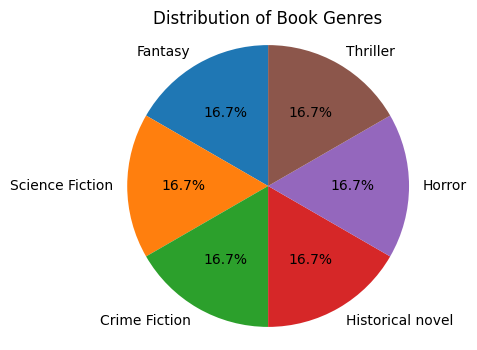

In [4]:

import matplotlib.pyplot as plt
# Assuming 'genre' column exists in the 'books' DataFrame
genre_counts = books['genre'].value_counts()
# Create the pie chart
plt.figure(figsize=(4, 4)) # Adjust figure size as needed
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Genres')
plt.axis('equal') # Equal aspect ratio ensures that the pie chart is circular
plt.show()


affichage des ratio de genres de livres dans un diagramme en barres

/tmp/ipython-input-1254838737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=books, x='genre', order=books['genre'].value_counts().index, palette='viridis')


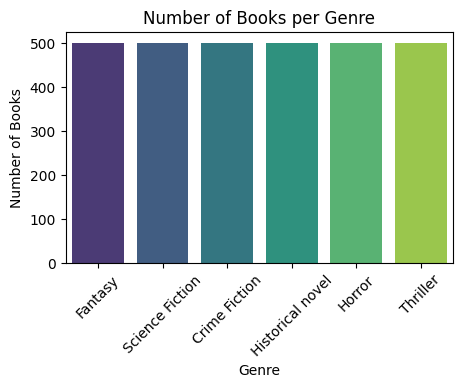

In [5]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.countplot(data=books, x='genre', order=books['genre'].value_counts().index, palette='viridis')
plt.title('Number of Books per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

Retirer les caracteres et symboles spéciaux et mettre en minuscules

In [6]:
print(" avant -------------------------------")
print(books['summary'].iloc[1])
import re
def clean_text(text):
    # Remove special symbols and convert text to lowercase in one step
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text

books['summary'] = books['summary'].apply(clean_text)
print(" après -------------------------------")
print(books['summary'].iloc[1])

 avant -------------------------------
 As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from

Supression des "stopwords" anglais ( les mots ou termes inutiles a la compréhension )

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Set of English stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stopwords

print("Stop words:", stop_words)
print("Number of stop words:", len(stop_words))
print("\n")

print("Example avec le numero 3 ***********************")
print("   --------------------avant suppression des stop_words--------------------------")

print(books['summary'].iloc[3])
print("  ************************************************")
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])
    # Apply the function to the 'summary' column
books['summary'] = books['summary'].apply(remove_stopwords)#remmove stopwords from the 'summary' column
print("  --------------------apres suppression des stop_words-----------------")
print("\n")
print(books['summary'].iloc[3])
print("  ************************************************")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stop words: {'be', 'hadn', 'hasn', 'my', 'if', "she's", 'by', 'who', 'out', 'so', 'their', 'mightn', 'an', 'are', 'herself', "she'd", 'from', "he's", "needn't", 'under', 'over', 'mustn', 'with', 'couldn', 'wouldn', 'the', 'theirs', "couldn't", "mustn't", "they're", 'of', 'we', 'will', 'those', 'ours', "shouldn't", "doesn't", 'y', 'but', 'doing', 'themselves', 'about', "you've", 're', 'there', 'you', "won't", 'myself', "hasn't", 'any', "hadn't", 'should', "he'd", "i'd", 'above', 'too', 'than', 'wasn', "i'll", 'its', 'yours', 'few', 'which', 'to', 'they', 'when', 'ourselves', "that'll", 'am', "i've", 'have', 'hers', 'same', 'o', "you'd", "you're", 'nor', "they'll", 'each', 'his', 't', 'a', 'how', 'not', 'shan', "she'll", 'needn', 'yourselves', 'had', 'own', 'only', 'being', 'during', 'it', 'i', "wasn't", 'was', 'itself', 'off', 'into', 'in', 'aren', "isn't", 'other', "shan't", 'most', "you'll", 'him', 'both', 'for', 'at', "he'll", 'won', 'is', "don't", 'further', 'and', 'once', "haven't"

stemming et tokenization (cad reduire chaque mot a leur racine )

In [8]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
stemmer = PorterStemmer()# Initialize the Porter Stemmer

print(" avant  tokenization et stemming : ***********************")
print(books['summary'].iloc[3])

# Function to stem text

word= word_tokenize(books['summary'].iloc[3])
stemmed_word = [stemmer.stem(word) for word in word]
print(" apres tokenization puis stemming : ***********************")
print(stemmed_word)
print("\n")


 avant  tokenization et stemming : ***********************
book opens heraldmage vanyel returning country valdemar extensive campaign along border karse neighboring enemy country checks valdemars king randale lifebonded mate shavri daughter jisa select know jisa vanyels daughter king randale sterile asked vanyel father heir shavri confides vanyel fear randale mortally ill vanyel mentor savil return vanyels family home forst reach find little rest peace parents try change mind shayachern homosexual vanyel becomes somewhat confused sexuality wonders truly love shavri yfandes vanyels companion doesnt buy finds situation amusing vanyel also meets illegitimate nephew medren medren small age vanyel like appears often bullied armsmaster jervis boy powerful bardic gift vanyel sponsors bardic collegium vanyel confronts jervis learns armsmaster intentionally rough also apologizes beating vanyel long ago explains difficult position vanyels father also mentions knew vanyel shayachern beginning als

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


 apres tokenization puis stemming : ***********************
['book', 'open', 'heraldmag', 'vanyel', 'return', 'countri', 'valdemar', 'extens', 'campaign', 'along', 'border', 'kars', 'neighbor', 'enemi', 'countri', 'check', 'valdemar', 'king', 'randal', 'lifebond', 'mate', 'shavri', 'daughter', 'jisa', 'select', 'know', 'jisa', 'vanyel', 'daughter', 'king', 'randal', 'steril', 'ask', 'vanyel', 'father', 'heir', 'shavri', 'confid', 'vanyel', 'fear', 'randal', 'mortal', 'ill', 'vanyel', 'mentor', 'savil', 'return', 'vanyel', 'famili', 'home', 'forst', 'reach', 'find', 'littl', 'rest', 'peac', 'parent', 'tri', 'chang', 'mind', 'shayachern', 'homosexu', 'vanyel', 'becom', 'somewhat', 'confus', 'sexual', 'wonder', 'truli', 'love', 'shavri', 'yfand', 'vanyel', 'companion', 'doesnt', 'buy', 'find', 'situat', 'amus', 'vanyel', 'also', 'meet', 'illegitim', 'nephew', 'medren', 'medren', 'small', 'age', 'vanyel', 'like', 'appear', 'often', 'bulli', 'armsmast', 'jervi', 'boy', 'power', 'bardic', 'g



---



---



Creation d'un classe

In [9]:


import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)

'''Ce code Python définit une classe TextStemmer qui permet de traiter efficacement
des textes en anglais : il réalise le "stemming" (réduction des mots à leur racine)
 et peut aussi supprimer les mots vides (stopwords).'''
class TextStemmer:
    def __init__(self, remove_stopwords=False):
        """
        Initialize stemmer with optional stopword removal.
        Args:
        remove_stopwords (bool): Whether to remove stopwords during processing
        """
        self.stemmer = PorterStemmer()# Initialize the Porter Stemmer
        self.stem_cache = {}
        self.remove_stopwords = remove_stopwords
        if remove_stopwords:
            self.stop_words = set(stopwords.words('english'))

    def stem_text(self, text):
        """
        Stem text efficiently using caching and optimized string joining.
        Args:
        text (str): Input text to stem
        Returns:
        str: Stemmed text
        """
        if not isinstance(text, str):
            return ""
        # Tokenize and convert to lowercase once
        words = word_tokenize(text.lower())
        # Filter stopwords if enabled
        if self.remove_stopwords:
            words = [word for word in words if word not in self.stop_words]
        # Use list comprehension with cache lookup for stemming
        stemmed_words = [
            self.stem_cache.setdefault(word, self.stemmer.stem(word))
            for word in words
        ]
        # Join words efficiently
        return ' '.join(stemmed_words)
    def process_dataframe(self, df, column):
        """
        Process an entire dataframe column efficiently.
        Args:
        df (pd.DataFrame): Input dataframe
        column (str): Column name to process
        Returns:
        pd.Series: Series with stemmed text
        """
        return df[column].astype(str).apply(self.stem_text)
    def get_example(self, df, column, index):
        """
        Get a specific example from the processed dataframe.
        Args:
        df (pd.DataFrame): Input dataframe
        column (str): Column name
        index (int): Row index
        Returns:
        str: Processed text at specified index
        """
        return df[column].iloc[index]

Instanciation et utilisation

In [10]:
books_old = books.copy()  # Keep a copy of the original DataFrame

stemmer_instance = TextStemmer(remove_stopwords=True) # Initialize with stopword removal
print(f" avant stemming: {books['summary'].iloc[3]}")
print(books['summary'].iloc[3])
# Process the entire dataframe
books['summary'] = stemmer_instance.process_dataframe(books, 'summary')
# Get specific example
print("-----------------------------------------------------------------")
print(f" apres stemming: {books['summary'].iloc[3]}")



 avant stemming: book opens heraldmage vanyel returning country valdemar extensive campaign along border karse neighboring enemy country checks valdemars king randale lifebonded mate shavri daughter jisa select know jisa vanyels daughter king randale sterile asked vanyel father heir shavri confides vanyel fear randale mortally ill vanyel mentor savil return vanyels family home forst reach find little rest peace parents try change mind shayachern homosexual vanyel becomes somewhat confused sexuality wonders truly love shavri yfandes vanyels companion doesnt buy finds situation amusing vanyel also meets illegitimate nephew medren medren small age vanyel like appears often bullied armsmaster jervis boy powerful bardic gift vanyel sponsors bardic collegium vanyel confronts jervis learns armsmaster intentionally rough also apologizes beating vanyel long ago explains difficult position vanyels father also mentions knew vanyel shayachern beginning also knew army service gay keep men courageou

application a la ligne 10

In [11]:

print(books_old['summary'].iloc[10])

example = stemmer_instance.get_example(books, 'summary', 10)
print(f"Processed example: \n{example}")

rhys mason former monk majere begins novel trying escape death knight auseric krell rhys retrieved soul dark knight ariakan imprisoned chemosh khas piece hands piece zeboim sends rhys nightshade back solace sheriff gerard seeks others counsel mounting beloved situation rhys agrees gerard stay solace help way possible encounter beloved rhys nightshade atta rhys dog head creature eventually ending new port rhys finally finds brother lleu beloved introduced first dark disciple novel tracking ever since elsewhere mina imprisoned new tower magic istar bottom blood sea newly erected dark god magic nuitari conclave wizards meeting nuitari reveals cousins tower three agree erect three towers high sorcery one back tower mina begins task set chemosh searching solia febalas hall sacrilege found unable take anything chemosh becomes overwhelmed godpresence hall finally nuitari returns gives mina zeboim begun assault upon tower zeboim takes mina first new port rhys brother meet mina vision rhys insi

Convertion du genre en numerique

In [12]:
print(books_old.head())

# Convert 'genre' column to numerical values using factorization
books['genre'] = pd.factorize(books['genre'])[0]


# Display the first few rows of the modified DataFrame

print(books.head())

    book_id                  book_name    genre  \
0   3248537          Drowned Wednesday  Fantasy   
1  27796919              The Lost Hero  Fantasy   
2   3910776  The Eyes of the Overworld  Fantasy   
3   5969644            Magic's Promise  Fantasy   
4   3173445             Taran Wanderer  Fantasy   

                                             summary  
0  drowned wednesday first trustee among morrow d...  
1  book opens jason awakens school bus unable rem...  
2  cugel easily persuaded merchant fianosther att...  
3  book opens heraldmage vanyel returning country...  
4  taran gurgi returned caer dallben following ev...  
    book_id                  book_name  genre  \
0   3248537          Drowned Wednesday      0   
1  27796919              The Lost Hero      0   
2   3910776  The Eyes of the Overworld      0   
3   5969644            Magic's Promise      0   
4   3173445             Taran Wanderer      0   

                                             summary  
0  drown wedn

Vectorization

In [13]:

# Import necessary libraries for text vectorization
from sklearn.feature_extraction.text import CountVectorizer
#la vecteur de mots (bag of words) est une representation des textes

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                            max_features=1000,stop_words='english')
bagofword_vec = count_vec.fit_transform(books['summary'])
print(bagofword_vec)


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 242226 stored elements and shape (3000, 1000)>
  Coords	Values
  (0, 271)	3
  (0, 225)	2
  (0, 57)	28
  (0, 980)	2
  (0, 49)	1
  (0, 861)	1
  (0, 103)	1
  (0, 88)	2
  (0, 951)	1
  (0, 257)	1
  (0, 452)	1
  (0, 781)	1
  (0, 16)	1
  (0, 412)	2
  (0, 218)	2
  (0, 66)	2
  (0, 295)	2
  (0, 910)	1
  (0, 860)	1
  (0, 750)	1
  (0, 85)	2
  (0, 963)	1
  (0, 916)	1
  (0, 770)	4
  (0, 416)	3
  :	:
  (2999, 276)	1
  (2999, 284)	1
  (2999, 23)	3
  (2999, 800)	2
  (2999, 858)	1
  (2999, 394)	2
  (2999, 822)	1
  (2999, 648)	9
  (2999, 373)	1
  (2999, 492)	1
  (2999, 148)	1
  (2999, 688)	1
  (2999, 399)	10
  (2999, 719)	2
  (2999, 611)	1
  (2999, 731)	2
  (2999, 6)	1
  (2999, 301)	1
  (2999, 839)	1
  (2999, 475)	1
  (2999, 797)	1
  (2999, 329)	2
  (2999, 500)	9
  (2999, 547)	2
  (2999, 448)	1


In [14]:
#afficher le dictionnaire des mots
print("Dictionnaire des mots (vocabulaire):", count_vec.get_feature_names_out())

Dictionnaire des mots (vocabulaire): ['abandon' 'abil' 'abl' 'aboard' 'abus' 'accept' 'accid' 'accident'
 'accompani' 'accus' 'act' 'action' 'activ' 'actual' 'adam' 'admir'
 'admit' 'adopt' 'advanc' 'adventur' 'affair' 'afterward' 'age' 'agent'
 'ago' 'agre' 'aid' 'air' 'alex' 'alien' 'aliv' 'alli' 'allow' 'alon'
 'alreadi' 'alway' 'america' 'american' 'ancient' 'angel' 'anim' 'anita'
 'ann' 'anoth' 'answer' 'anyon' 'anyth' 'apart' 'appar' 'appear'
 'approach' 'area' 'arm' 'armi' 'arrang' 'arrest' 'arriv' 'arthur' 'ask'
 'assassin' 'assault' 'assign' 'assist' 'associ' 'assum' 'attack'
 'attempt' 'attend' 'attent' 'attract' 'aubrey' 'aunt' 'author' 'avoid'
 'awaken' 'away' 'babi' 'band' 'bank' 'base' 'battl' 'bear' 'beat'
 'beauti' 'becam' 'becom' 'bed' 'befriend' 'begin' 'believ' 'ben' 'best'
 'betray' 'better' 'big' 'billi' 'birth' 'black' 'blood' 'board' 'boat'
 'bodi' 'bomb' 'book' 'born' 'bourn' 'box' 'boy' 'break' 'brief' 'bring'
 'british' 'broken' 'brother' 'brought' 'brutal' 'b

In [15]:
#afficher le 3eme mot du dictionnaire
print("3eme mot du dictionnaire:", count_vec.get_feature_names_out()[5])

3eme mot du dictionnaire: accept


In [16]:
# Convert the sparse matrix to a dense format
bagofword_vec2 = bagofword_vec.toarray()
print("Shape of the bag-of-words vector:", bagofword_vec2.shape)
print("First 5 rows of the bag-of-words vector:\n", bagofword_vec2[:5])

Shape of the bag-of-words vector: (3000, 1000)
First 5 rows of the bag-of-words vector:
 [[0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 1 ... 0 0 0]]




---



---



Création de la classe BookDataset

Le DataLoader de PyTorch va appeler __getitem__ automatiquement pour créer chaque batch, transformant chaque texte en données numériques parfaitement préparées pour le modèle

In [17]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'
import torch # PyTorch is a deep learning framework
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm

# Split the dataset into training and testing sets and define the target variable
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,test_size=0.2)
X_train.shape,X_test.shape



# Custom Dataset class
class BookDataset(Dataset):#hérite de torch.utils.data.Dataset
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length#longueur maximale des séquences de tokens

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])#récupère le résumé du livre à l'index idx et le convertit en chaîne de caractères
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,#dans le cas du code présenté (classification de résumés de livres avec RoBERTa), il ne s’agit que de padding masks
            return_tensors='pt'# 'pt' indique que les tenseurs retournés doivent être au format PyTorch
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



Création des fonctions pour l'entraînement  

In [18]:

def train_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0



    for batch in tqdm(data_loader, desc="Training"):
        #tqdm est une bibliothèque Python qui affiche une barre de progression pour toute boucle, ce qui permet de visualiser en temps réel l’avancement du traitement
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        #.to(device) permet d’utiliser ce masque avec RoBERTa en accélérant les calculs sur GPU si disponible

        labels = batch['labels'].to(device)

        optimizer.zero_grad()# Remise à zéro des gradients avant la rétropropagation
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        # Forward pass pour obtenir les sorties du modèle

        loss = outputs.loss# Calcul de la perte (loss)
        total_loss += loss.item()# Accumulation de la perte totale

        loss.backward()# Rétropropagation pour calculer les gradients
        optimizer.step()#Mise à jour des poids du modèle

    return total_loss / len(data_loader)# Retourne la perte moyenne sur l’ensemble des batches


Fonction d'evaluation du modèle pour le jeu de test

In [19]:

def evaluate(model, data_loader, device):#évaluation du modèle sur un ensemble de données de test
    model.eval()# Met le modèle en mode évaluation
    predictions = []
    actual_labels = []

    with torch.no_grad():
        # Désactive le calcul des gradients pour économiser de la mémoire et accélérer les calculs (on est en evaluation)
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            #.to(device) permet d’utiliser ce masque avec RoBERTa en accélérant les calculs sur GPU si disponible

            attention_mask = batch['attention_mask'].to(device)
            #.to(device) permet d’utiliser ce masque avec RoBERTa en accélérant les calculs sur GPU si disponible

            labels = batch['labels']
            #labels ne sont pas déplacées sur le device car elles sont utilisées pour le calcul de l’accuracy uniquement

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # Forward pass pour obtenir les sorties du modèle
            _, preds = torch.max(outputs.logits, dim=1)
            #torch.max renvoie la valeur maximale et son index le long d’une dimension spécifiée (ici dim=1, c’est-à-dire pour chaque ligne)


            predictions.extend(preds.cpu().numpy())
            # Déplace les prédictions sur le CPU et les convertit en tableau numpy avant de les ajouter à la liste des prédictions

            actual_labels.extend(labels.cpu().numpy())
            # Déplace les labels sur le CPU et les convertit en tableau numpy avant de les ajouter à la liste des labels réels


    return accuracy_score(actual_labels, predictions)
    # Calcule et retourne l’accuracy en comparant les labels réels aux prédictions





---



Programme principal

In [20]:
def train_roberta_classifier(books, num_epochs=6, batch_size=8):
    # Prepare data
    X_train, X_test, y_train, y_test = train_test_split(
        books['summary'].values,
        books['genre'].values,
        test_size=0.2,
        random_state=42
    )

    # Initialize tokenizer and encode labels
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Create datasets
    train_dataset = BookDataset(X_train, y_train_encoded, tokenizer)
    test_dataset = BookDataset(X_test, y_test_encoded, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=len(label_encoder.classes_)
    ).to(device)

    # Initialize optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

    # Training loop
    best_accuracy = 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        avg_loss = train_epoch(model, train_loader, optimizer, device)
        accuracy = evaluate(model, test_loader, device)

        print(f"Average loss: {avg_loss:.4f}")
        print(f"Accuracy: {accuracy:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            # Optionally save the best model
            #torch.save(model.state_dict(), 'best_model.pth')

    return model, label_encoder, best_accuracy


In [21]:
model, label_encoder, best_accuracy = train_roberta_classifier(books)
print(f"\nBest accuracy achieved: {best_accuracy:.4f}")
print("Model and label encoder are ready for use.")

#sauvegarder le model
torch.save(model.state_dict(), 'roberta_book_genre_classifier.pth')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.15it/s]


Average loss: 1.4580
Accuracy: 0.5967

Epoch 2/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


Average loss: 0.9826
Accuracy: 0.6567

Epoch 3/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.13it/s]


Average loss: 0.7915
Accuracy: 0.6600

Epoch 4/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


Average loss: 0.6416
Accuracy: 0.6617

Epoch 5/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.12it/s]


Average loss: 0.4980
Accuracy: 0.6650

Epoch 6/6


Evaluating: 100%|██████████| 75/75 [00:18<00:00,  4.00it/s]


Average loss: 0.3686
Accuracy: 0.6917

Best accuracy achieved: 0.6917
Model and label encoder are ready for use.


In [22]:
torch.save(model.state_dict(), 'drive/MyDrive/roberta_books/roberta_book_genre_classifier.pth')

In [23]:
# print("Model saved to 'roberta_book_genre_classifier.pth'")

# # Charger le modèle sauvegardé
# model.load_state_dict(torch.load('roberta_book_genre_classifier.pth'))

In [24]:
summary_topredict_1 = "A thrilling mystery novel set in a small town, where a detective unravels secrets and solves crimes."



In [25]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
encoding = tokenizer.encode_plus(
        summary_topredict_1,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
input_ids = encoding['input_ids'].to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
attention_mask = encoding['attention_mask'].to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


In [26]:
genre_num = 5
genre_unique = books_old[books['genre'] == genre_num]['genre'].unique()
print("Le genre associé à la valeur 5 est :", genre_unique)

Le genre associé à la valeur 5 est : ['Thriller']


In [27]:

model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predicted_class_idx = torch.argmax(logits, dim=1).item()

# Convertir l’indice en nom de genre
predicted_genre = label_encoder.inverse_transform([predicted_class_idx])
print(f"Résumé : {summary_topredict_1}")


print(f"Genre prédit : {predicted_genre[0]}")

genre_unique = books_old[books['genre'] == predicted_genre[0]]['genre'].unique()
print("Le genre associé à la valeur 5 est :", genre_unique[0])


Résumé : A thrilling mystery novel set in a small town, where a detective unravels secrets and solves crimes.
Genre prédit : 2
Le genre associé à la valeur 5 est : Crime Fiction




---



---



Fonction pour la prediction pour un seul summary

In [28]:

def predict_genre(text, model, tokenizer, label_encoder, device, max_length=512):
    """
    Predict genre for a single text using the trained RoBERTa model
    """
    # Prepare the text
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, prediction = torch.max(outputs.logits, dim=1)

    # Convert prediction to genre label
    predicted_genre = label_encoder.inverse_transform([prediction.item()])[0]
    return predicted_genre

Prediction pour un seul summary utilisant la fonction

In [37]:
summary_topredict_2 = "A heartwarming romance between two people from different worlds, overcoming obstacles to be together."

prediction2= predict_genre(summary_topredict_2, model, tokenizer, label_encoder, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

print(prediction2)
# Convert prediction to genre label
genre_unique = books_old[books['genre'] == prediction2]['genre'].unique()
print("Le genre associé  est :", genre_unique[0])


4
Le genre associé  est : Horror


Fonction de Prediction pour un batch de "summaries"

In [43]:

def predict_genres_batch(texts, model, tokenizer, label_encoder, device, batch_size=2, max_length=512):
    """
    Predict genres for a batch of texts
    """
    model.eval()
    predictions = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # Prepare batch
        encodings = tokenizer(
            batch_texts,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # Move to device
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)

        # Get predictions
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, batch_predictions = torch.max(outputs.logits, dim=1)

        # Convert predictions to genre labels
        batch_genres = label_encoder.inverse_transform(batch_predictions.cpu().numpy())
        predictions.extend(batch_genres)

    return predictions

Applel a fonction pour un batch de summaries

In [44]:
# create a batch of 10 book summaries and predict its genre using the function predict_genres_batch
summaries_batch = [ "A thrilling mystery novel set in a small town, where a detective unravels secrets and solves crimes.",
         "A heartwarming romance between two people from different worlds, overcoming obstacles to be together.",
         "An epic fantasy adventure in a magical realm, where heroes embark on quests to save their world.",
         "A science fiction tale exploring futuristic technology and its impact on society.",
         "A historical fiction novel set during World War II, following the lives of ordinary people in extraordinary times.",
         "A gripping thriller about a journalist uncovering a major conspiracy that puts their life at risk.",
         "A coming-of-age story about a young protagonist navigating the challenges of adolescence and self-discovery.",
         "A dystopian novel depicting a bleak future where society is controlled by an oppressive regime.",
         "A lighthearted comedy about a group of friends embarking on hilarious misadventures.",
         "A non-fiction book exploring the wonders of the natural world and the importance of conservation."
    ]

predicted_genres_batch = predict_genres_batch(summaries_batch, model, tokenizer, label_encoder, torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
for summary, genre in zip(summaries_batch, predicted_genres_batch):
    print("----------------------------------------------\n")

    print(f"Résumé : {summary}\nGenre prédit : {genre}\n\n")




----------------------------------------------

Résumé : A thrilling mystery novel set in a small town, where a detective unravels secrets and solves crimes.
Genre prédit : 2


----------------------------------------------

Résumé : A heartwarming romance between two people from different worlds, overcoming obstacles to be together.
Genre prédit : 4


----------------------------------------------

Résumé : An epic fantasy adventure in a magical realm, where heroes embark on quests to save their world.
Genre prédit : 0


----------------------------------------------

Résumé : A science fiction tale exploring futuristic technology and its impact on society.
Genre prédit : 1


----------------------------------------------

Résumé : A historical fiction novel set during World War II, following the lives of ordinary people in extraordinary times.
Genre prédit : 0


----------------------------------------------

Résumé : A gripping thriller about a journalist uncovering a major conspira

Fonction d'evaluations ???

In [31]:
def evaluate_model_performance(books, model, tokenizer, label_encoder):
    """
    Evaluate model performance and add predictions to the books DataFrame
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Get predictions for all books
    predicted_genres = predict_genres_batch(
        books['summary'],
        model,
        tokenizer,
        label_encoder,
        device
    )

    # Add predictions to DataFrame
    books_with_predictions = books.copy()
    books_with_predictions['predicted_genre'] = predicted_genres

    # Calculate accuracy
    accuracy = (books_with_predictions['genre'] == books_with_predictions['predicted_genre']).mean()

    return books_with_predictions, accuracy